<a href="https://colab.research.google.com/github/MeenaRuwandi/INCS_870_Project_IDSforMinorAttacks/blob/meena/Exp2_generalSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install imbalanced-learn
!pip install scikit-learn
!pip install seaborn
!pip install gdown
!pip install xgboost
import gdown

In [12]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [13]:
file_ids = [
    '1zOeCqtGZjAj_nSLe3W5MH5pDQM28bPde',  # Wednesday dataset
    '1WL00LFkCA2ylV8_8c6jm52bnEhGLcKsq']  # Thursday Morining dataset

# Download each file
for i, file_id in enumerate(file_ids):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, f'dataset_{i + 1}.csv', quiet=False)  # Saves as dataset_1.csv, dataset_2.csv, etc.

Downloading...
From (original): https://drive.google.com/uc?id=1zOeCqtGZjAj_nSLe3W5MH5pDQM28bPde
From (redirected): https://drive.google.com/uc?id=1zOeCqtGZjAj_nSLe3W5MH5pDQM28bPde&confirm=t&uuid=55d833d4-6ff8-4024-99a7-014e777edd8f
To: /content/dataset_1.csv
100%|██████████| 225M/225M [00:03<00:00, 62.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WL00LFkCA2ylV8_8c6jm52bnEhGLcKsq
To: /content/dataset_2.csv
100%|██████████| 52.0M/52.0M [00:00<00:00, 212MB/s]


In [14]:
dataset_paths = [
    '/content/dataset_1.csv','/content/dataset_2.csv']

# Make the data frame
dataframes = [pd.read_csv(path) for path in dataset_paths]

# Combine all datasets into one dataframe
combined_dataset = pd.concat(dataframes, ignore_index=True)

combined_dataset.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,863069.000000,8.630690e+05,863069.000000,863069.000000,8.630690e+05,8.630690e+05,863069.000000,863069.000000,863069.000000,863069.000000,...,863069.000000,863069.000000,8.630690e+05,8.630690e+05,8.630690e+05,8.630690e+05,8.630690e+05,8.630690e+05,8.630690e+05,8.630690e+05
mean,6123.157330,2.493452e+07,10.655431,11.755382,5.554667e+02,1.992481e+04,220.601763,16.537313,58.123094,75.856690,...,7.266929,26.528879,8.871007e+04,4.744110e+04,1.631125e+05,6.058081e+04,1.847505e+07,4.066081e+05,1.882314e+07,1.814301e+07
std,16276.972347,4.132275e+07,834.919392,1103.785281,6.498214e+03,2.528963e+06,579.010897,48.861499,147.477310,212.643439,...,799.900462,6.345935,6.852438e+05,4.553637e+05,1.075841e+06,5.966177e+05,3.540628e+07,4.096570e+06,3.576154e+07,3.533630e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.980000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,5.277200e+04,2.000000,2.000000,7.600000e+01,1.720000e+02,45.000000,0.000000,40.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,5.570988e+07,7.000000,6.000000,3.610000e+02,4.707000e+03,330.000000,35.000000,55.000000,122.398257,...,2.000000,32.000000,8.980000e+02,0.000000e+00,8.990000e+02,7.610000e+02,9.986750e+06,0.000000e+00,1.000000e+07,9.761932e+06
max,65529.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.030000e+08,7.420000e+07,1.050000e+08,1.030000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [15]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863069 entries, 0 to 863068
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             863069 non-null  int64  
 1    Flow Duration                863069 non-null  int64  
 2    Total Fwd Packets            863069 non-null  int64  
 3    Total Backward Packets       863069 non-null  int64  
 4   Total Length of Fwd Packets   863069 non-null  int64  
 5    Total Length of Bwd Packets  863069 non-null  int64  
 6    Fwd Packet Length Max        863069 non-null  int64  
 7    Fwd Packet Length Min        863069 non-null  int64  
 8    Fwd Packet Length Mean       863069 non-null  float64
 9    Fwd Packet Length Std        863069 non-null  float64
 10  Bwd Packet Length Max         863069 non-null  int64  
 11   Bwd Packet Length Min        863069 non-null  int64  
 12   Bwd Packet Length Mean       863069 non-nul

In [16]:
# Pre processing
x = combined_dataset.drop(columns=[' Label'])
y = combined_dataset[' Label']
# Handle missing values
x.fillna(x.mean(), inplace=True)

# Get 'Label' column that indicates attack types
class_distribution = combined_dataset[' Label'].value_counts()
print(class_distribution)

class_distribution = y.value_counts()
class_distribution_percent = y.value_counts(normalize=True) * 100

print("\nClass Distribution (Percentages):\n", class_distribution_percent)

 Label
BENIGN                        608217
DoS Hulk                      231073
DoS GoldenEye                  10293
DoS slowloris                   5796
DoS Slowhttptest                5499
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

Class Distribution (Percentages):
  Label
BENIGN                        70.471422
DoS Hulk                      26.773410
DoS GoldenEye                  1.192605
DoS slowloris                  0.671557
DoS Slowhttptest               0.637145
Web Attack � Brute Force       0.174609
Web Attack � XSS               0.075544
Web Attack � Sql Injection     0.002433
Heartbleed                     0.001275
Name: proportion, dtype: float64


<ipython-input-17-2d7cd28d2606>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='plasma')


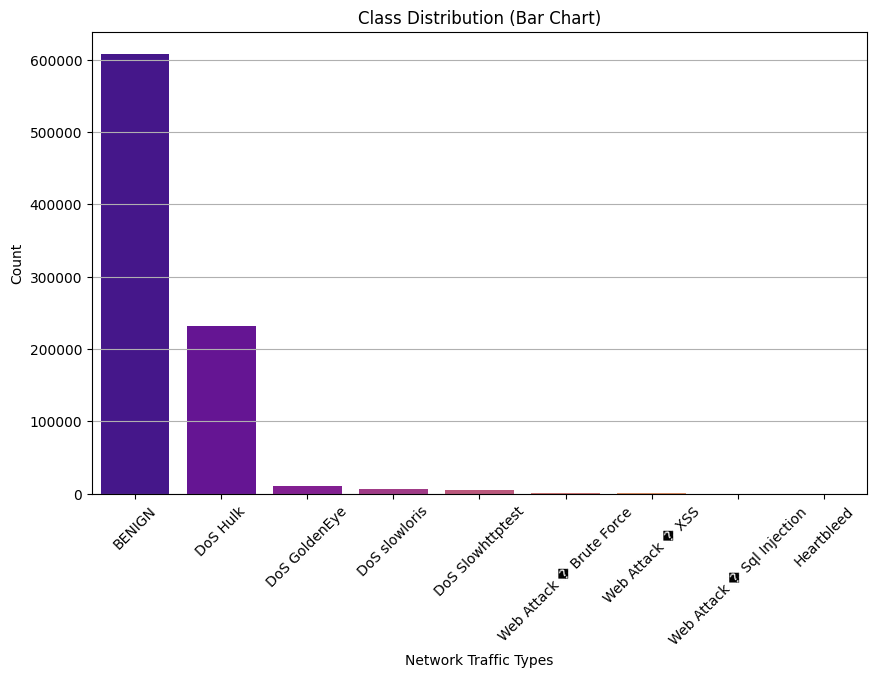

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for class distribution feature types
class_counts = y.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='plasma')
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Network Traffic Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [18]:
# Get an overview of the dataset
print(combined_dataset.shape)
print(combined_dataset.head())
print(combined_dataset.info())  # Review structure, data types, and non-null counts
print(combined_dataset.describe())  # Summary statistics

(863069, 79)
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                          6660    

In [21]:
#Handle the missing values, NaN values and clean the dataset
#check for missing values
missing_values=combined_dataset.isnull().sum()
print("missing values in each column :\n", missing_values[missing_values>0])

# Calculate total missing values
total_missing_values = missing_values.sum()
print("\nTotal missing values in the dataset:", total_missing_values)

#fill missing values with the mean value of 'Flow Bytes/s' column with its mean value
meanVal = combined_dataset['Flow Bytes/s'].mean()

#verify if all the missing values are handled
combined_dataset['Flow Bytes/s'].fillna(meanVal, inplace=True)
missingValCheck = combined_dataset.isnull().sum()

# Check for total missing values after dropping rows
missing_values_after_dropping = combined_dataset.isna().sum().sum()
print("Total missing values after dropping rows:", missing_values_after_dropping)

# Show how many rows are left after dropping rows with missing values
remaining_rows = combined_dataset.shape[0]
print("Total rows remaining after dropping rows with missing values:", remaining_rows)  # Before Handling missing values number of raws = 863069

# Check how many duplicate records are in the dataset before removing them
duplicate_records = combined_dataset.duplicated().sum()
print("Total duplicate records in the dataset:", duplicate_records)

# Remove duplicate records
combined_dataset = combined_dataset.drop_duplicates()

# Checking if duplicates were removed
print("Data shape after removing duplicates:", combined_dataset.shape)

missing values in each column :
 Series([], dtype: int64)

Total missing values in the dataset: 0
Total missing values after dropping rows: 0
Total rows remaining after dropping rows with missing values: 863069


<ipython-input-21-e5d79340f787>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_dataset['Flow Bytes/s'].fillna(meanVal, inplace=True)


Total duplicate records in the dataset: 94003
Data shape after removing duplicates: (769066, 79)


In [24]:
combined_dataset.info()
# Class distribution after cleaning the missing values & duplicate racords
print(combined_dataset[' Label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 769066 entries, 0 to 863068
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             769066 non-null  int64  
 1    Flow Duration                769066 non-null  int64  
 2    Total Fwd Packets            769066 non-null  int64  
 3    Total Backward Packets       769066 non-null  int64  
 4   Total Length of Fwd Packets   769066 non-null  int64  
 5    Total Length of Bwd Packets  769066 non-null  int64  
 6    Fwd Packet Length Max        769066 non-null  int64  
 7    Fwd Packet Length Min        769066 non-null  int64  
 8    Fwd Packet Length Mean       769066 non-null  float64
 9    Fwd Packet Length Std        769066 non-null  float64
 10  Bwd Packet Length Max         769066 non-null  int64  
 11   Bwd Packet Length Min        769066 non-null  int64  
 12   Bwd Packet Length Mean       769066 non-null  fl

In [31]:
import numpy as np
import pandas as pd

# Assuming combined_dataset is already defined and contains your data

# Automatically detect numerical columns
numerical_cols = combined_dataset.select_dtypes(include=['float64', 'int64']).columns

# Check for NaN values before processing
print("NaN values in dataset before processing:\n", combined_dataset[numerical_cols].isna().sum())
nan_count_before = combined_dataset[numerical_cols].isna().sum().sum()
print("Total NaN values in dataset before processing:", nan_count_before)

# Check for infinity values
print("Infinity values in dataset (by column):\n", np.isinf(combined_dataset[numerical_cols]).sum())
infinity_count = np.isinf(combined_dataset[numerical_cols]).sum().sum()
print("Total Infinity values in dataset:", infinity_count)

# Fill NaN with the mean of each column
combined_dataset[numerical_cols] = combined_dataset[numerical_cols].fillna(combined_dataset[numerical_cols].mean())

# Check NaN values after filling with mean
nan_count_after_filling_mean = combined_dataset[numerical_cols].isna().sum().sum()
print("Total NaN values in dataset after filling with mean:", nan_count_after_filling_mean)

# Replace infinity with NaN
combined_dataset[numerical_cols] = combined_dataset[numerical_cols].replace([np.inf, -np.inf], np.nan)

# Check NaN values after replacing infinity
nan_count_after_replacing_infinity = combined_dataset[numerical_cols].isna().sum().sum()
print("Total NaN values in dataset after replacing infinity:", nan_count_after_replacing_infinity)

# Fill NaN with the mean of each column again
combined_dataset[numerical_cols] = combined_dataset[numerical_cols].fillna(combined_dataset[numerical_cols].mean())

# Final check for NaN values
final_nan_count = combined_dataset[numerical_cols].isna().sum().sum()
print("Total NaN values in dataset after all processing:", final_nan_count)

# Check for infinity values again after processing
infinity_count_after_processing = np.isinf(combined_dataset[numerical_cols]).sum().sum()
print("Total Infinity values in dataset after processing:", infinity_count_after_processing)

NaN values in dataset before processing:
  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64
Total NaN values in dataset before processing: 0
Infinity values in dataset (by column):
  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64
Total Infinity values in dataset: 0
Total NaN values in dataset after filling with mean: 0
T

Shape of features (X): (769066, 78)
Shape of target (y): (769066,)
First 5 rows of features (X):
     Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2        

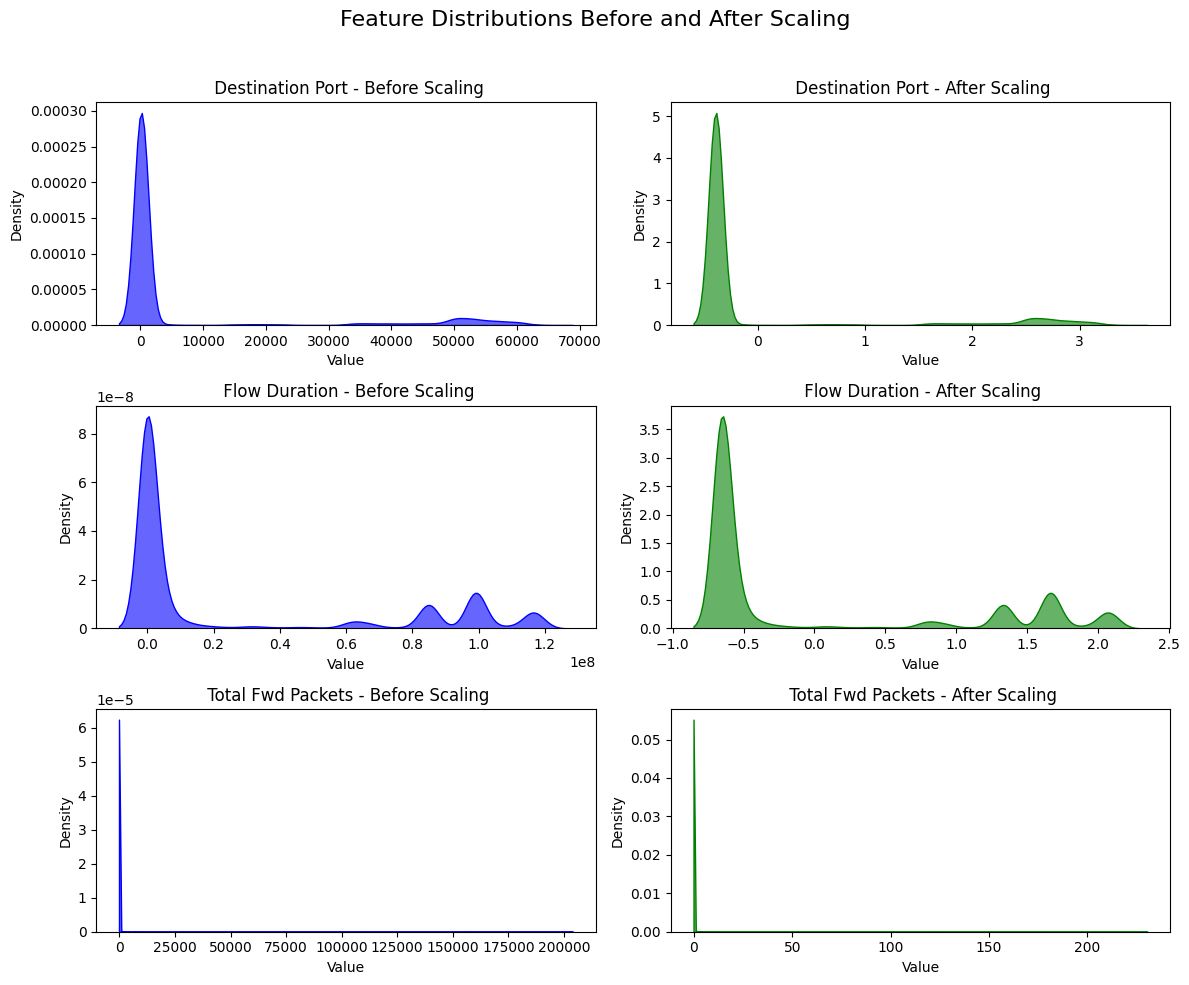

First 5 rows of scaled features:
    Destination Port  Flow Duration  Total Fwd Packets
0         -0.396223      -0.652799          -0.012096
1         -0.378146      -0.653683          -0.000790
2         -0.395755      -0.653669          -0.001920
3         -0.378146      -0.653339           0.005994
4         -0.395755      -0.653669          -0.003051


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ensure that X (features) and y (target) are prepared from previous steps
X = combined_dataset.drop(' Label', axis=1)  # Assuming 'Label' is the target column
y = combined_dataset[' Label']  # Target variable

# Display the shapes of X and y
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Display the first few rows of features and target
print("First 5 rows of features (X):\n", X.head())
print("First 5 rows of target (y):\n", y.head())

# Encode the labels (target variable) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# If needed, scale the features (assuming scaling is required)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Display the actual column names in the dataset
print("Available columns in the dataset:\n", X.columns)

# Step 2: Select actual columns from the dataset
# Let's say you want to visualize the first three features from your dataset
features_to_visualize = X.columns[:3]  # Selecting the first three features dynamically

# Step 3: Select the chosen features from the dataset
X_selected = X[features_to_visualize]

# Display the first 5 rows of selected features (before scaling)
print("\nFirst 5 rows of selected features before scaling:\n", X_selected.head())


# If needed, scale the selected features
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

# Create DataFrame for scaled features
X_scaled_df = pd.DataFrame(X_scaled_selected, columns=features_to_visualize)

# Display the first 5 rows of scaled features
print("\nFirst 5 rows of selected features after scaling:\n", X_scaled_df.head())

# Plot comparison of feature distribution before and after scaling
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Feature Distributions Before and After Scaling', fontsize=16)

# Loop through each feature to plot before and after scaling
for idx, feature in enumerate(features_to_visualize):

    # Before Scaling plot (left column)
    sns.kdeplot(X_selected[feature], label=f'{feature} (Before Scaling)', fill=True, color='blue', ax=axes[idx, 0], alpha=0.6)
    axes[idx, 0].set_title(f'{feature} - Before Scaling', fontsize=12)
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Density')

    # After Scaling plot (right column)
    sns.kdeplot(X_scaled_df[feature], label=f'{feature} (After Scaling)', fill=True, color='green', ax=axes[idx, 1], alpha=0.6)
    axes[idx, 1].set_title(f'{feature} - After Scaling', fontsize=12)
    axes[idx, 1].set_xlabel('Value')
    axes[idx, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Verify the scaling worked
print("First 5 rows of scaled features:\n", X_scaled_df.head())